In [ ]:
from ella.data.simulate_data import *

import matplotlib.pyplot as plt

In [34]:
n_genes: int = 2 #!!!
n_cells: int = 1 #!!!
SC_TOTAL: float = 1.0
genes_data: List[Dict] = []
for idx_gene in range(n_genes):
    gene_data: Dict = {"gene_id": idx_gene}
    gene_data["cells"] = []
    for idx_cell in range(n_cells):
        cell_info: Dict = {"cell_id": idx_cell}
        r_bins: List[Bin] = generate_r_bins(5) 
        lambda_star_i: List[float] = generate_lambda_star_i(
            r_bins=r_bins,
            a0=1.0, #!!!
            b0=4.0, #!!!
            alpha=1.0, #!!!
            beta=0.0, #!!!
            sigma0_squared=0.01,
            rho=0.0,
            sc_total=SC_TOTAL,
        )
        cell_info["points"] = generate_data(
            count_per_cell=1000, #!!!
            lambda_star_i=lambda_star_i,
            r_bins=r_bins,
        )
        cell_info["sc_total"] = SC_TOTAL
        gene_data["cells"].append(cell_info)
    genes_data.append(gene_data)

out_path = Path("simulated_data.jsonl")
out_path.parent.mkdir(exist_ok=True, parents=True)
# with out_path.open("w", encoding="utf-8") as f:
#     for gene_data in genes_data:
#         f.write(f"{json.dumps(gene_data)}\n")

(array([ 27.,  25.,  54.,  54., 107.,  95., 155., 156., 162., 165.]),
 array([0.00898343, 0.10798875, 0.20699408, 0.3059994 , 0.40500472,
        0.50401004, 0.60301536, 0.70202068, 0.80102601, 0.90003133,
        0.99903665]),
 <BarContainer object of 10 artists>)

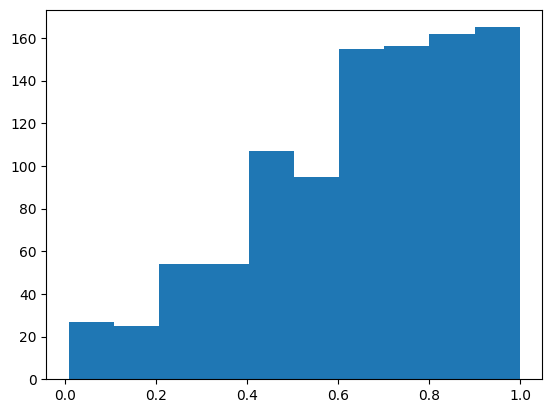

In [35]:
plt.hist(cell_info["points"])

In [36]:
r_bins=r_bins
a0=1.0 #!!!
b0=4.0 #!!!
alpha=0.0 #!!!
beta=1.0 #!!!
sigma0_squared=0.00001
rho=0.0
sc_total=SC_TOTAL
results: List[float] = []
for r_bin in r_bins:
    r_mid = r_bin.mid
    varphi: float = beta_dist.pdf(r_mid, a0, b0)
    print(f'varphi={varphi}')
    epsilon_i: float = np.random.normal(0, np.sqrt(sigma0_squared + rho * varphi))
    lambda_i: float = alpha + beta * varphi + epsilon_i
    print(f'lambda_i={lambda_i}')
    lambda_star_i: float = sc_total * 2 * pi * r_mid * lambda_i
    lambda_star_i = max(lambda_star_i, 0)
    print(f'lambda_star_i={lambda_star_i}')
    results.append(lambda_star_i)

varphi=2.916
lambda_i=2.9200139256503044
lambda_star_i=1.8346988594405778
varphi=1.3719999999999999
lambda_i=1.3692915509084231
lambda_star_i=2.581053766173886
varphi=0.49999999999999994
lambda_i=0.5017907062189855
lambda_star_i=1.5764219962971988
varphi=0.10799999999999994
lambda_i=0.10686689439028028
lambda_star_i=0.47002515045984516
varphi=0.003999999999999998
lambda_i=0.0005268974633657569
lambda_star_i=0.0029795349601889265


In [37]:
varphi

0.003999999999999998